<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-Vadere-project" data-toc-modified-id="Load-the-Vadere-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the Vadere project</a></span><ul class="toc-item"><li><span><a href="#Method-A-Plots" data-toc-modified-id="Method-A-Plots-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Method A Plots</a></span></li><li><span><a href="#Method-B-Plots" data-toc-modified-id="Method-B-Plots-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Method B Plots</a></span></li><li><span><a href="#Method-C-Plots-(classical-density)" data-toc-modified-id="Method-C-Plots-(classical-density)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Method C Plots (classical density)</a></span></li><li><span><a href="#Method-E-Plots-(voronoi-density)" data-toc-modified-id="Method-E-Plots-(voronoi-density)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Method E Plots (voronoi density)</a></span></li><li><span><a href="#Method-D-Plots-(voronoi-density)" data-toc-modified-id="Method-D-Plots-(voronoi-density)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Method D Plots (voronoi density)</a></span></li></ul></li></ul></div>

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vadereanalysistool import ScenarioOutput, VadereProject
from scipy.optimize import curve_fit

%matplotlib inline

def pxToInch(px, dpi=96):
    return px / dpi

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})

def plotFundamentalDiagram(output, prefix):
    dataFrames = []
    for fileStr in out.files :
        if fileStr.startswith(prefix):
            start = fileStr.find("_")
            end = fileStr.find(".")
            
            ndf = pd.DataFrame();
            df = out.files[fileStr]()
            ndf['density'] = df.density.astype(float)
            ndf['velocity'] = df.velocity.astype(float)
            ndf['position'] = ['center' if start == -1 else fileStr[start+1:end]] * len(df.velocity)
            ndf = ndf[(ndf.velocity < 2) & (ndf.density < 4)]
            # ndf = ndf.iloc[::16, :]
            dataFrames.append(ndf)
    
    concatFrames = pd.concat(dataFrames)
    
    g = sns.relplot(x="density", y="velocity", hue="position", data=concatFrames,
                height=10, aspect=1)
    
    g.set(
        yticks=np.arange(0, 2.5, 0.5), 
        xticks=np.arange(0, 4.5, 0.5)
    )
    
    title = "{0}-obstacleDensityWeight-{1}".format(
        output.scenario['name'],
        output.scenario['scenario']['attributesModel']['org.vadere.state.attributes.models.AttributesFloorField']['timeCostAttributes']['obstacleDensityWeight']
    )
    g.fig.suptitle(title, fontsize=15)
    g.fig.set_size_inches(pxToInch(800), pxToInch(500))
    

# Load the Vadere project

In [15]:
projectFolder = "./../../../VadereModelTests/TestCWL/"
project = VadereProject(projectFolder)
#out = project.named_output.C_050_180_180_2018_11_26_16_30_29_355() 

loaded 12 out of 12 output directories. 


## Method A Plots

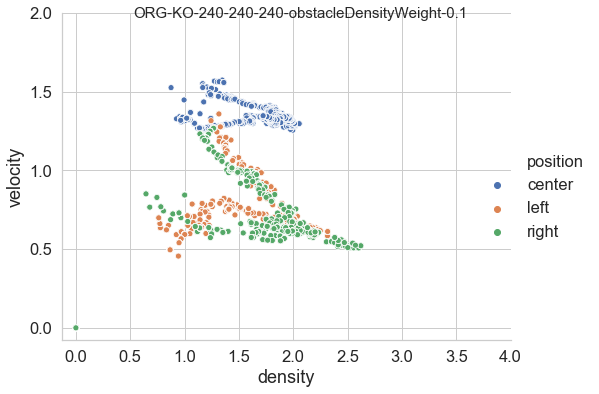

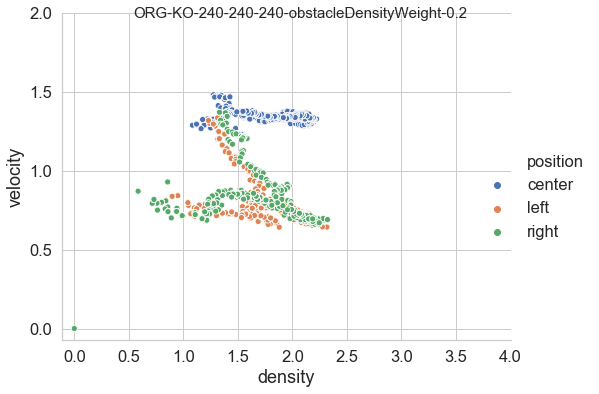

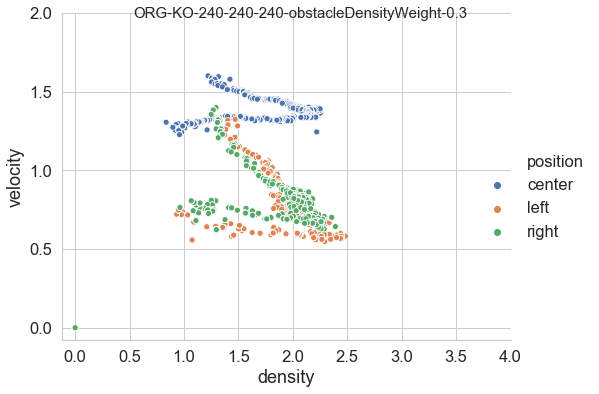

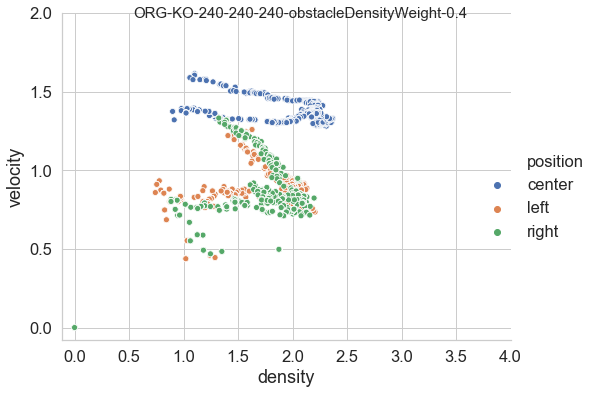

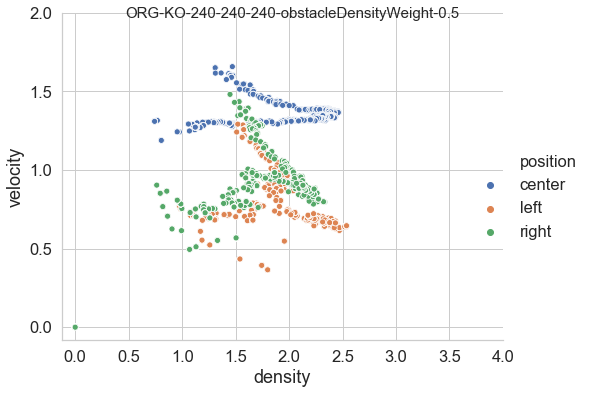

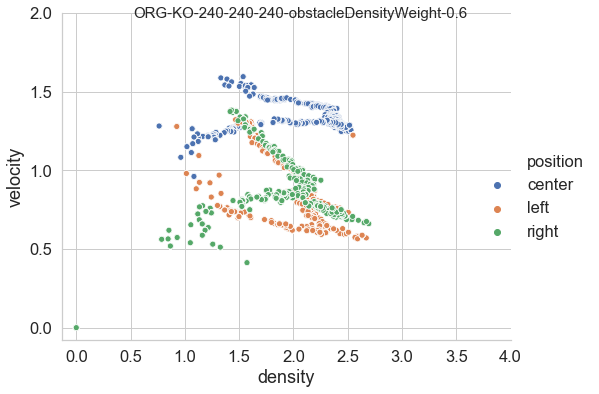

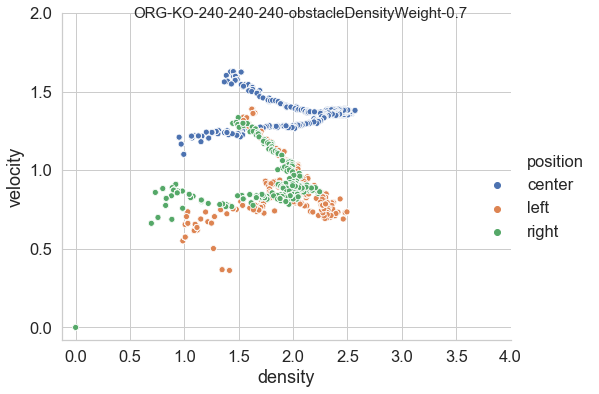

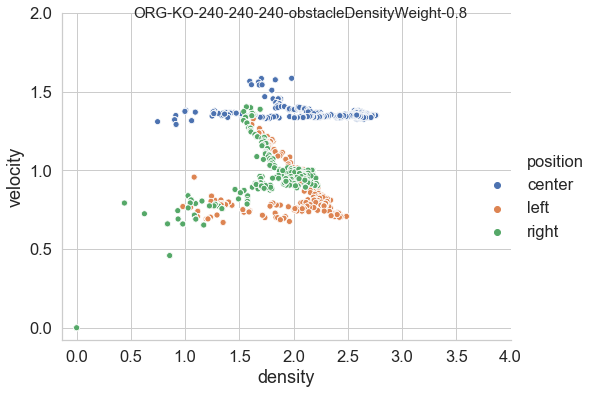

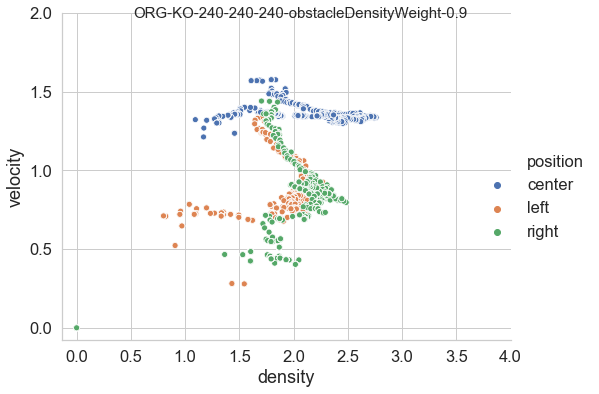

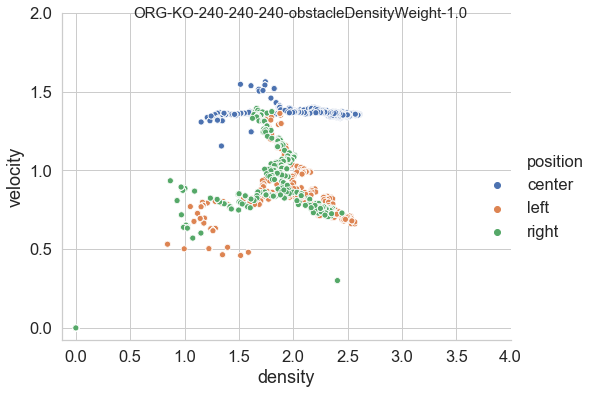

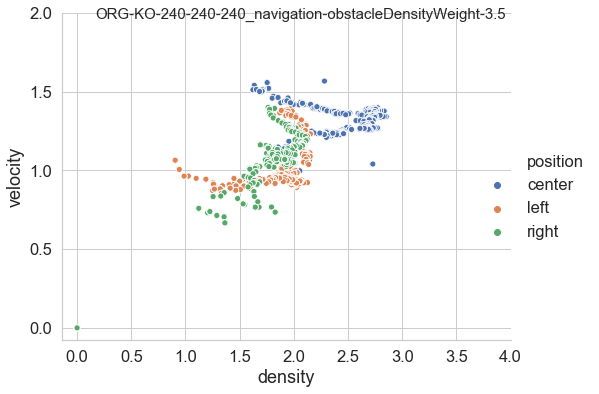

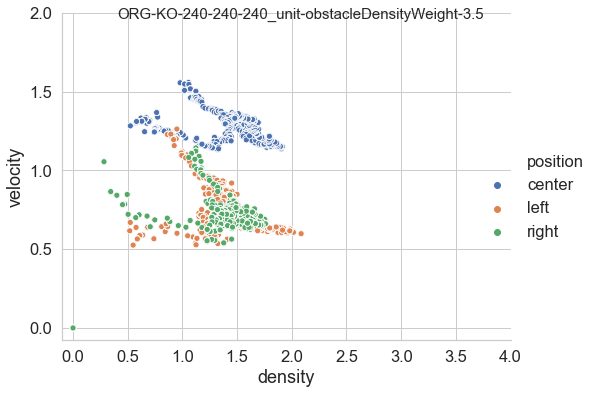

In [60]:
for outStr in project.output_dirs :
    out = project.output_dirs[outStr]
    plotFundamentalDiagram(out, "aTimeStep")
    

## Method B Plots

In [53]:
plotFundamentalDiagram(project, "bPedestrian.fundamentalDiagram")

ValueError: No objects to concatenate

## Method C Plots (classical density)

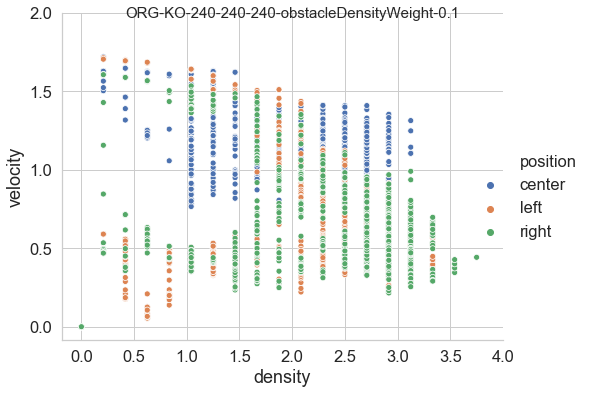

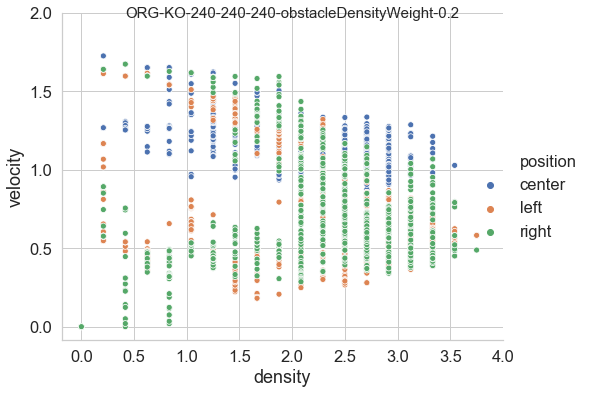

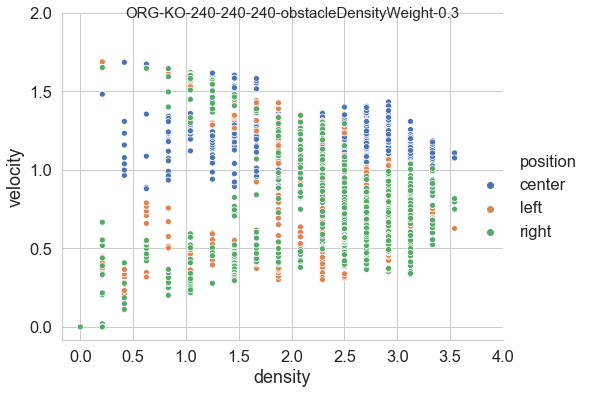

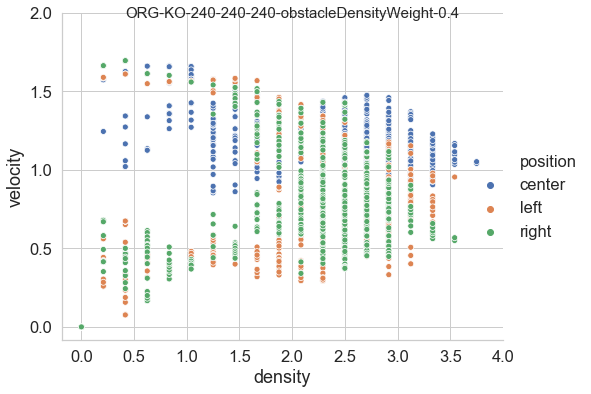

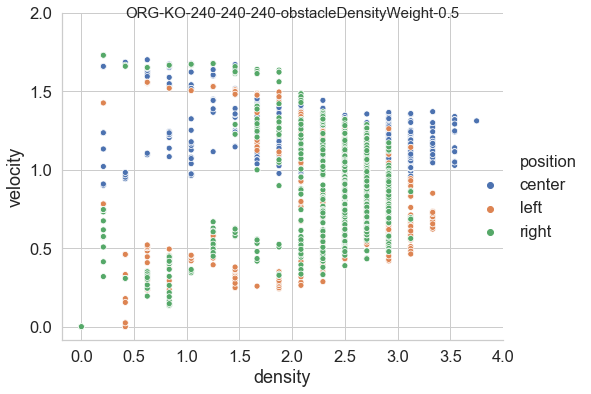

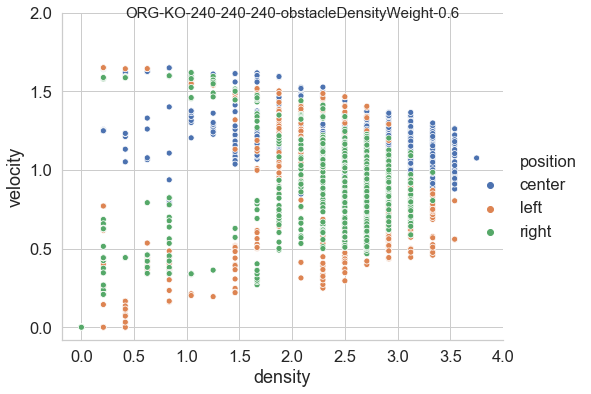

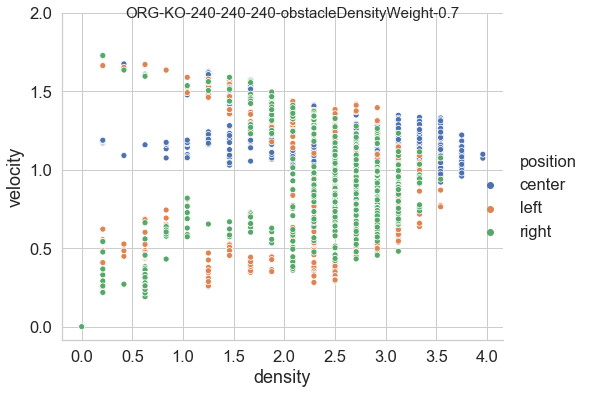

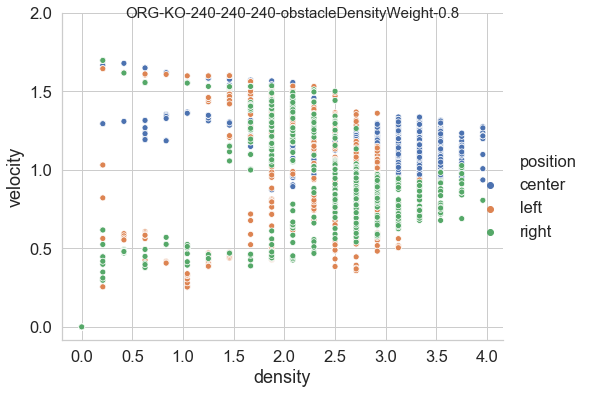

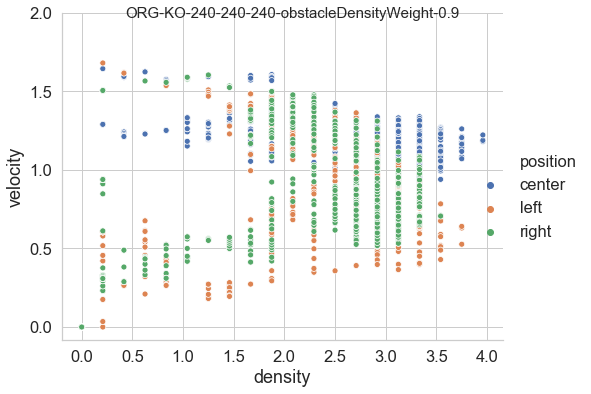

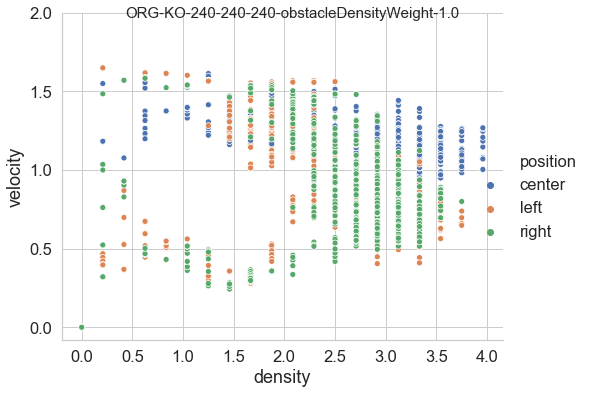

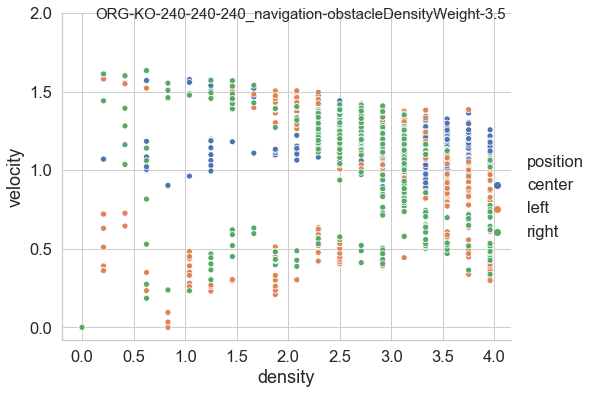

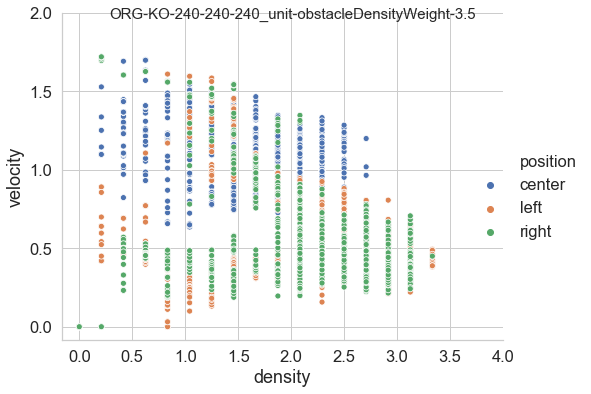

In [61]:
for outStr in project.output_dirs :
    out = project.output_dirs[outStr]
    plotFundamentalDiagram(out, "cTimeStep")

## Method E Plots (voronoi density)

In [58]:
plotFundamentalDiagram(project, "eTimeStep.fundamentalDiagram")

ValueError: No objects to concatenate

## Method D Plots (voronoi density)

In [56]:
plotFundamentalDiagram(project, "dTimeStep.fundamentalDiagram")

ValueError: No objects to concatenate

In [ ]:
np.linspace(0, 200, num=201).tolist()

In [ ]:
import matplotlib.pyplot as plt

coord1 = [[23.926582253991363,11.311616564587455],[24.526824188631515,11.346725287186784],[24.52439283212948,11.89],[23.80719398422859,11.89]]
coord1.append(coord1[0])
coord2 = [[22.0,10.1], [24.0,10.1], [24.0,11.9], [22.0,11.9], [22.0,10.1]]
coord2.append(coord2[0])
cap = [[23.926582253991363,11.311616564587455],[24.000000000000014,11.315910838495633],[24.000000000000025,11.889999999999956],[23.80719398422859,11.89]]
cap.append(cap[0])

xs1, ys1 = zip(*coord1) #create lists of x and y values
xs2, ys2 = zip(*coord2) 
xs3, ys3 = zip(*cap) 
plt.figure(figsize=(10,10))
plt.plot(xs1,ys1)
plt.plot(xs2,ys2)
plt.plot(xs3,ys3)
plt.show() # if you need...


In [ ]:
import matplotlib.pyplot as plt

coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show() # if you need..